In [12]:
import pandas as pd
import json
import os
import seaborn as sns
%matplotlib inline

In [10]:
#read text
human_label_df = pd.read_csv('data/doc2dial/human_label.csv', header=None)

In [11]:
human_label_df[0]

0      no
1      no
2      no
3     yes
4      no
     ... 
95    yes
96    yes
97    yes
98     no
99     no
Name: 0, Length: 100, dtype: object

In [10]:
def example(index):
    # print(df.loc[index])
    print('Question: ')
    print(df.loc[index]['question'])
    print('True Answer:')
    print(df.loc[index]['answer'])
    print('Model Answer:')
    print(df.loc[index]['model_answer'])
    print('True Ref:')
    print(df.loc[index]['true_ref_str'])
    print('retrived_doc:')
    print(df.loc[index]['retrived_doc'])

    
def analys(df):
    answer_f1_avg = df['answer_f1'].mean()
    answer_prec = df['answer_prec'].mean()
    answer_recall = df['answer_recall'].mean()
    # autoais_retrevied = df['autoais_retrevied(model_answer)'].mean()
    autoais_retrevied = len(df[df['autoais_retrevied(model_answer)'] == '1'])/len(df)
    att_f1 = df['att_f1'].mean()
    att_prec = df['att_prec'].mean()
    att_recall = df['att_recall'].mean()
    autoais_true_answer = len(df[df['autoais_true_answer'] == '1'])/len(df)
    print(f'answer_f1_avg: {answer_f1_avg}')
    print(f'answer_prec: {answer_prec}')
    print(f'answer_recall: {answer_recall}')
    print(f'autoais_retrevied: {autoais_retrevied}')
    print(f'att_f1: {att_f1}')
    print(f'att_prec: {att_prec}')
    print(f'att_recall: {att_recall}')
    print(f'autoais_true_answer: {autoais_true_answer}')
    

In [13]:
target_path = 'data/doc2dial/random'

# folders = []
for subfolder in os.listdir(target_path):
    if not os.path.isdir(os.path.join(target_path, subfolder)):
        continue
    subfolder_path = os.path.join(target_path, subfolder)

    eval_path = os.path.join(subfolder_path, 'eval.csv')
    extra_path = os.path.join(subfolder_path, 'extra_eval.csv')
    cos_sim_path = os.path.join(subfolder_path, 'cos_sim.csv')

    eval_df = pd.read_csv(eval_path)
    extra_df = pd.read_csv(extra_path)
    cos_sim_df = pd.read_csv(cos_sim_path)

    concat_df = pd.concat([eval_df, extra_df, cos_sim_df], axis=1)
    concat_df.to_csv(os.path.join(subfolder_path, 'concat.csv'))
    # folders.append(subfolder_path)

In [2]:
test_path = 'data/doc2dial/new_dataset/DEFAULT'
eval_path = os.path.join(test_path, 'eval.csv')
extra_path = os.path.join(test_path, 'extra_eval.csv')
cos_sim_path = os.path.join(test_path, 'cos_sim.csv')

eval_df = pd.read_csv(eval_path)
extra_df = pd.read_csv(extra_path)
cos_sim_df = pd.read_csv(cos_sim_path)

print(len(eval_df), len(extra_df), len(cos_sim_df))


1000 1000 1000


# Or read concat directly from file

In [15]:
concat_df = pd.read_csv('data/doc2dial/new_dataset/doc2dial_250_top1/concat.csv')

In [26]:
concat_df['autoais_true_answer']

0                                                    yes
1                                                    yes
2                                                     no
3                                                    yes
4      The cost of the traffic points is independent ...
                             ...                        
995                           it is not possible to tell
996                           it is not possible to tell
997                                                   no
998                                                   no
999                                                   no
Name: autoais_true_answer, Length: 1000, dtype: object

In [21]:
concat_df['autoais_retrevied(model_answer)'] == 'yes'

0       True
1      False
2      False
3       True
4       True
       ...  
995     True
996    False
997    False
998    False
999     True
Name: autoais_retrevied(model_answer), Length: 1000, dtype: bool

In [3]:
concat_df = pd.concat([eval_df, extra_df, cos_sim_df], axis=1)

In [5]:
concat_df.columns

Index(['question', 'answer', 'model_answer', 'true_ref_str', 'retrived_doc',
       'answer_f1', 'answer_prec', 'answer_recall',
       'autoais_retrevied(model_answer)', 'att_f1', 'att_prec', 'att_recall',
       'autoais_true_answer', 'ref_range', 'BLEU', 'ROUGHLS', 'BLEU_ANS',
       'ROUGHLS_ANS', 'cos_sim', 'cos_sim_ans'],
      dtype='object')

In [4]:
concat_df.dtypes

question                            object
answer                              object
model_answer                        object
true_ref_str                        object
retrived_doc                        object
answer_f1                          float64
answer_prec                        float64
answer_recall                      float64
autoais_retrevied(model_answer)     object
att_f1                             float64
att_prec                           float64
att_recall                         float64
autoais_true_answer                 object
ref_range                           object
BLEU                               float64
ROUGHLS                            float64
BLEU_ANS                           float64
ROUGHLS_ANS                        float64
cos_sim                            float64
cos_sim_ans                        float64
dtype: object

In [52]:
num_cols = []
for col in concat_df.columns:
    if concat_df[col].dtype == 'float64':
        num_cols.append(col)

In [23]:
att_features = ['true_ref_str', 'retrived_doc', 'att_f1', 'att_prec', 'att_recall', 'BLEU', 'ROUGHLS', 'cos_sim']
ans_features = ['answer', 'model_answer', 'answer_f1', 'answer_prec', 'answer_recall', 'BLEU_ANS',
       'ROUGHLS_ANS', 'cos_sim_ans']
others = ['question', 'ref_range', 'autoais_retrevied(model_answer)', 'autoais_true_answer']


20 20


In [34]:
len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])

459

In [14]:
len(concat_df[concat_df['autoais_true_answer'] == 'yes']) + len(concat_df[concat_df['autoais_true_answer'] == 'no'])

558

In [27]:
def analys_df(concat_df):
    n = len(concat_df)
    autoais_model_answer = len(concat_df[concat_df['autoais_retrevied(model_answer)'] == 'yes'])/n
    autoais_answer = len(concat_df[concat_df['autoais_true_answer'] == 'yes'])/n
    concat_df['autoais_true_answer'] = concat_df['autoais_true_answer'].replace({'yes': 1, 'no': 0, 'it is not possible to tell': -1})

    print('autoais_model_answer: ', autoais_model_answer)
    print('autoais_answer: ', autoais_answer)

In [28]:
analys_df(concat_df)

autoais_model_answer:  0.499
autoais_answer:  0.398


In [31]:
concat_df.iloc[4]['autoais_true_answer']

'The cost of the traffic points is independent of the DRA, so you get a separate charge based on the total points you accumulate.'

<Axes: >

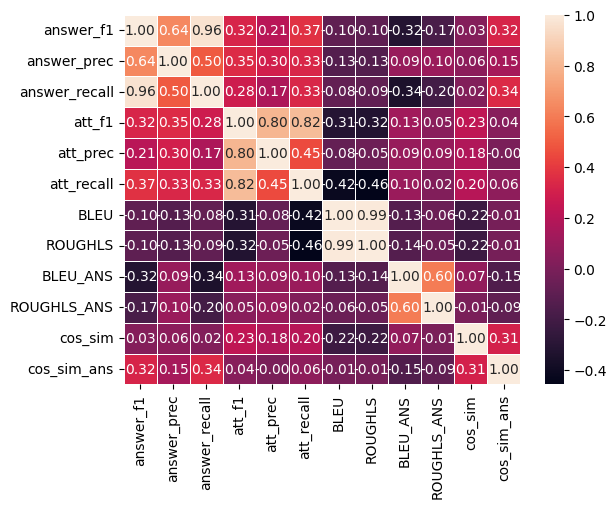

In [61]:
sns.heatmap(concat_df[num_cols].corr(), annot=True, linewidths=.5, fmt= '.2f')

In [ ]:
def heatmap(concat_df):
    pass